In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import permutations
import numpy as np
import pandas as pd
from collections import deque

# Assignmnet 3: Main chain modelling
Author: Míriam Méndez

**Exercise 1: Find a path where the distance between consecutive alpha-carbon atoms can vary from 3.8 Å, you can choose your own value for this.**

Path: 2 -> 4 -> 1 -> 3 -> 5 -> 6 -> 7 -> 9 -> 10 -> 8


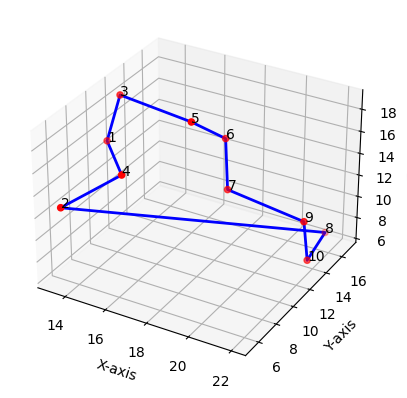

Total number of alpha-carbon = 10


In [28]:

#### INPUT ####
file_path = "test_q1.txt"
atom_separation, threshold = 3.8, 0.1 # 3.8 angstroms


### EXERCISE 1 ####
# Set up
data = pd.read_csv(file_path, sep='\s+', names=['id', 'x', 'y', 'z'])
avg_sep = (atom_separation - threshold, atom_separation + threshold)


# Building the distance matrix 
distances = np.zeros((len(data),len(data)))
for i in range(0,len(data)):
    for j in range(0,len(data)):
        distances[i][j]  = np.sqrt((data['x'][i] - data['x'][j])**2 + (data['y'][i] - data['y'][j])**2 + (data['z'][i] - data['z'][j])**2)


# We compute all the possible paths we can had with permutations.
# We search the one that fullfill the constraints i.e. the distance between pairs.
# When we obtain it, we return the path
def path(distances, avg_sep):
    n = len(distances)
    all_permutations = permutations(range(n))
    for path in all_permutations:
        valid_path = True
        for i in range(len(path) - 1):
            distance = distances[path[i], path[i + 1]]
            if not (avg_sep[0] <= distance <= avg_sep[1]):
                valid_path = False
                break
        if valid_path:
            return path
    return None


### OUTPUT ###
# Get the path
path = path(distances, avg_sep)

if path is not None:
    print('Path:', ' -> '.join(str(data['id'][i]) for i in path))

    # Plotting the points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data['x'], data['y'], data['z'], c='r', marker='o')

    # Plotting the path
    hamiltonian_x = [data['x'][i] for i in path]
    hamiltonian_y = [data['y'][i] for i in path]
    hamiltonian_z = [data['z'][i] for i in path]
    hamiltonian_x.append(hamiltonian_x[0])
    hamiltonian_y.append(hamiltonian_y[0])
    hamiltonian_z.append(hamiltonian_z[0])
    ax.plot(hamiltonian_x, hamiltonian_y, hamiltonian_z, c='b', linewidth=2)

    # Adding axis labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    # Adding point labels
    for i, txt in enumerate(data['id']):
        ax.text(data['x'][i], data['y'][i], data['z'][i], f'{txt}', color='black')

    plt.show()
else:
    print(f'No valid path found with {atom_separation} ± {threshold}')

print(f'Total number of alpha-carbon = {len(data)}')


**Exercise 2: Some of the free atoms in the input file are alpha-carbon atoms. Find the longest chain of candidate alpha-carbon atoms.** 

In attempting to address the given exercise, I encountered certain difficulties that prevented me from its completion. However, I wish to present the strategy I had planned to employ to solve the problem.

First of all, I aimed to obtain all the pairs of atoms that fullfill the contraint of 3.8 A. I decided to store all the pairs in dominoes variable. This varaible stored the information like this:  [(1,2), (1,3), (2,3),...].
This representation denoted the connections between atoms, where atom one is connected to atoms two and three, and atom two is connected to atom three. 

Secondly, since all the information we need is stored like that, it can be solved as dominoes problem. However, the biggest challenge was to construct the longest connection path. The objective of the dominoes problem was to ensure that each pair in the sequence corresponded with the next pair. For example, in the previous example the output would be like this: [(1,2), (2,3), (3,1),...]. This signifies that atom one is connected to atoms two and three, and atom two is connected to atom three. This was easy to achieve, but the second part of obtaining the maximum number of connected pieces I couldn't manage it, but I wanted to share my intended approach in the hope that it conveys my understanding and effort.

[(2, 3), (2, 15), (3, 18), (5, 30), (8, 19), (8, 31), (11, 35), (13, 27), (13, 39), (14, 31), (14, 43), (15, 26), (18, 34), (18, 38), (18, 44), (20, 21), (20, 27), (21, 40), (24, 30), (26, 53), (28, 29), (28, 35), (33, 44), (35, 43), (35, 52), (35, 58), (36, 48), (37, 54), (37, 64), (37, 77), (38, 56), (38, 62), (38, 81), (39, 60), (41, 46), (41, 56), (43, 52), (43, 61), (43, 69), (43, 76), (44, 72), (45, 80), (46, 81), (47, 61), (47, 72), (48, 65), (52, 75), (53, 71), (58, 64), (60, 73), (60, 84), (60, 106), (61, 62), (62, 68), (62, 106), (63, 65), (65, 74), (67, 70), (68, 82), (68, 106), (69, 71), (69, 85), (70, 78), (72, 79), (73, 76), (75, 108), (76, 77), (78, 133), (79, 106), (79, 129), (81, 133), (82, 116), (82, 129), (85, 141), (86, 134), (87, 95), (87, 129), (88, 96), (90, 141), (91, 157), (92, 147), (93, 167), (95, 156), (97, 114), (98, 99), (98, 111), (98, 160), (100, 134), (102, 143), (103, 118), (103, 149), (103, 164), (105, 115), (105, 137), (105, 150), (105, 180), (105, 1

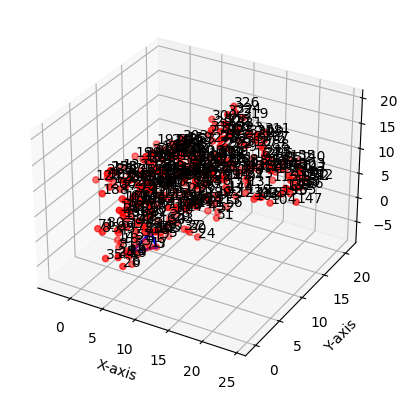

Total number of alpha-carbon = 280


In [27]:

#### INPUT ####
file_path = "data_q2.txt"
atom_separation, threshold = 3.8, 0.1 # 3.8 angstroms


### EXERCISE 2 ####
# Set up
data = pd.read_csv(file_path, sep='\s+', names=['id', 'x', 'y', 'z'])
avg_sep = (atom_separation - threshold, atom_separation + threshold)


# Obtaining all the atoms that fullfill the constraints
dominos = []
for i in range(0,len(data)):
    for j in range(0,len(data)):
        if i < j:
            distance = np.sqrt((data['x'][i] - data['x'][j])**2 + (data['y'][i] - data['y'][j])**2 + (data['z'][i] - data['z'][j])**2)
            if avg_sep[0] <=  distance <= avg_sep[1]:
                dominos.append((i,j))
print(dominos)


def longest_dominoes_chain(tiles):
    tile_dict = {}
    for tile in tiles:
        tile_dict[tile[0]] = tile_dict.get(tile[0], []) + [tile]
    
    max_length = 0
    max_sequence = []
    queue = deque([(tile, 1, [tile]) for tile in tiles])

    while queue:
        current_tile, current_length, current_sequence = queue.popleft()

        next_tile_options = tile_dict.get(current_tile[1], [])
        for next_tile in next_tile_options:
            tile_dict[current_tile[1]].remove(next_tile)
            new_length = current_length + 1
            new_sequence = current_sequence + [next_tile]
            queue.append((next_tile, new_length, new_sequence))

            if new_length > max_length:
                max_length = new_length
                max_sequence = new_sequence
    return max_sequence

### OUTPUT ###
# Get the path
path = longest_dominoes_chain(dominos)


if path is not None:
    print('Path:', ' -> '.join(str(data['id'][i]) for (i,j) in path))

    # Plotting the points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data['x'], data['y'], data['z'], c='r', marker='o')

    # Plotting the path
    hamiltonian_x = [data['x'][i] for (i,j) in path]
    hamiltonian_y = [data['y'][i] for (i,j) in path]
    hamiltonian_z = [data['z'][i] for (i,j) in path]
    hamiltonian_x.append(hamiltonian_x[0])
    hamiltonian_y.append(hamiltonian_y[0])
    hamiltonian_z.append(hamiltonian_z[0])
    ax.plot(hamiltonian_x, hamiltonian_y, hamiltonian_z, c='b', linewidth=2)

    # Adding axis labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    # Adding point labels
    for i, txt in enumerate(data['id']):
        ax.text(data['x'][i], data['y'][i], data['z'][i], f'{txt}', color='black')

    plt.show()
else:
    print(f'No valid path found with {atom_separation} ± {threshold}')
    
print(f'Total number of alpha-carbon = {len(dominos)}')
